In [1]:
import numpy as np
import matplotlib.pyplot as plt
from image_quality_analyzer import ImageQualityAnalyzerGCNR

### load data

In [3]:
cimg_np3_005_3 = np.load('H:/2018_Sayako_Kodera_BA_Daten/npy_data/ESE/pos_scan/dim_4_posdef_0/dr/dx_np_3/cimg_max_sigma_005_3.npy')
cimg_ref = np.load('npy_data/ESE/grid/cimg_max_05_oa_0.npy')


In [17]:
plt.figure(1)
plt.imshow(cimg_ref)
plt.title('Reference')
plt.show()

In [18]:
plt.figure(2)
plt.imshow(cimg_np3_005_3)
plt.title('Np3 sigma 005 sam 3')
plt.show()

In [4]:
cimg_ref = np.load('npy_data/ESE/grid/cimg_max_05_oa_0.npy')
#cimg_posscan_7mm = np.load('npy_data/ESE/pos_scan/dim_4_posdef_0/dr/np_3/cimg_max_sigma_700_0.npy')
#cimg_posscan_2mm = np.load('npy_data/ESE/pos_scan/dim_4_posdef_0/dr/np_3/20181115_0_2_mm/cimg_max_sigma_20_0.npy')

### ROI setting with 3dB circle

In [5]:
analyzer1 = ImageQualityAnalyzerGCNR(cimg_ref)
analyzer1.set_roi(cimg_ref, np.array([[10, 9], [16, 18], [20, 23], [29, 32]]), 
                  0.5)
roi = analyzer1.roi

TypeError: super() takes at least 1 argument (0 given)

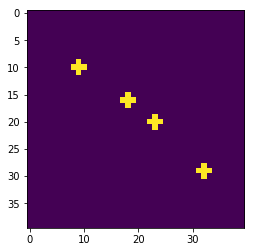

In [4]:
plt.imshow(roi)

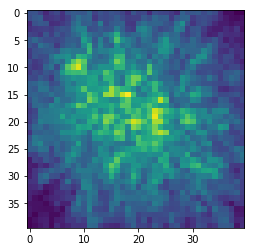

In [5]:
plt.imshow(cimg_posscan_7mm)

### GCNR with the rerence data & ROI(3dB)

In [6]:
GCNR1 = analyzer1.get_gcnr()
GCNR1

0.85

In [7]:
print('error pixels inside : {}'.format(analyzer1.pix_missed))
print('error pixels ourside : {}'.format(analyzer1.pix_false))
print('epsilon : {}'.format(analyzer1.epsilon))
print('pixels inside : {}'.format(len(analyzer1.pdf_inside)))
print('PDF inside : {}'.format(analyzer1.pdf_inside))

error pixels inside : 1
error pixels ourside : 2
epsilon : 0.4207123831461666
pixels inside : 20
PDF inside : [0.4207123831461666, 0.4282806272579949, 0.4334295679552889, 0.43740837000045446, 0.5153300040342834, 0.5224525380732077, 0.5510469650723994, 0.5680036241387272, 0.5802104073468614, 0.5821598320957939, 0.583524257036578, 0.5835709705982481, 0.630505307419418, 0.639369029101538, 0.6414712204770715, 0.6427046321208841, 0.6428820209051337, 0.7372816618945175, 0.9175113930705355, 1.0]


### GCNR with the pos_scan 7mm & ROI(3dB)

In [8]:
analyzer2 = ImageQualityAnalyzerGCNR(cimg_posscan_7mm, roi)
GCNR2 = analyzer2.get_gcnr()
GCNR2

0.09999999999999998

In [9]:
print('error pixels inside : {}'.format(analyzer2.pix_missed))
print('error pixels ourside : {}'.format(analyzer2.pix_false))
print('epsilon : {}'.format(analyzer2.epsilon))
print('pixels inside : {}'.format(len(analyzer2.pdf_inside)))
print('PDF inside : {}'.format(analyzer2.pdf_inside))

error pixels inside : 17
error pixels ourside : 1
epsilon : 0.9380540315118716
pixels inside : 20
PDF inside : [0.4980567774105622, 0.5446568122644178, 0.5681441435038712, 0.6126767122160055, 0.6323147361781243, 0.6422671263576956, 0.6638036615920535, 0.6979239255993768, 0.7128991735979784, 0.7291017589613256, 0.7617731445528217, 0.7831275365347804, 0.8178003943315426, 0.8618320448008407, 0.8663778247960652, 0.8792874645045228, 0.8848164505258298, 0.9568232204082481, 0.9706378573008264, 1.0]


### test with different epsilon to check if this is the optimized epsion 

In [10]:
dum_epsilon = 0.7291017589613256
pix_missed = len([x for x in analyzer2.pdf_inside if x <= dum_epsilon])
pix_false = len([x for x in analyzer2.pdf_outside if x >= dum_epsilon])
print('error pixels inside : {}'.format(pix_missed))
print('error pixels ourside : {}'.format(pix_false))

error pixels inside : 10
error pixels ourside : 61


### ROI setting with 0dB

In [11]:
analyzer3 = ImageQualityAnalyzerGCNR(cimg_ref)
analyzer3.set_roi(cimg_ref, np.array([[10, 9], [16, 18], [20, 23], [19, 32]]), 1)
roi_0dB = analyzer3.roi
np.where(roi_0dB == 1)

(array([10, 16, 19, 20, 29]), array([ 9, 18, 23, 23, 32]))

### GCNR with the reference data & ROI(0dB)

In [12]:
GCNR3 = analyzer3.get_gcnr()
GCNR3

1.0

In [13]:
print('error pixels inside : {}'.format(analyzer3.pix_missed))
print('error pixels ourside : {}'.format(analyzer3.pix_false))
print('epsilon : {}'.format(analyzer3.epsilon))
print('pixels inside : {}'.format(len(analyzer3.pdf_inside)))
print('PDF inside : {}'.format(analyzer3.pdf_inside))

error pixels inside : 3
error pixels ourside : 0
epsilon : 0.7372816618945175
pixels inside : 5
PDF inside : [0.630505307419418, 0.6414712204770715, 0.7372816618945175, 0.9175113930705355, 1.0]


### GCNR with the pos_scan 7mm & ROI(0dB)

In [14]:
analyzer4 = ImageQualityAnalyzerGCNR(cimg_posscan_7mm, roi_0dB)
GCNR4 = analyzer4.get_gcnr()
GCNR4

0.0

In [15]:
print('error pixels inside : {}'.format(analyzer4.pix_missed))
print('error pixels ourside : {}'.format(analyzer4.pix_false))
print('epsilon : {}'.format(analyzer4.epsilon))
print('pixels inside : {}'.format(len(analyzer4.pdf_inside)))
print('PDF inside : {}'.format(analyzer4.pdf_inside))

error pixels inside : 3
error pixels ourside : 2
epsilon : 0.9380540315118716
pixels inside : 5
PDF inside : [0.6323147361781243, 0.7831275365347804, 0.8848164505258298, 0.9568232204082481, 0.9706378573008264]


In [16]:
[x for x in analyzer4.pdf_outside if x >= analyzer4.epsilon]

[0.9380540315118716, 1.0]

### GCNR with pos_scan 2mm & ROI(0dB)

In [17]:
analyzer5 = ImageQualityAnalyzerGCNR(cimg_posscan_2mm, roi_0dB)
GCNR5 = analyzer5.get_gcnr()
GCNR5

0.19999999999999996

In [18]:
print('error pixels inside : {}'.format(analyzer5.pix_missed))
print('error pixels ourside : {}'.format(analyzer5.pix_false))
print('epsilon : {}'.format(analyzer5.epsilon))
print('pixels inside : {}'.format(len(analyzer5.pdf_inside)))
print('PDF inside : {}'.format(analyzer5.pdf_inside))

error pixels inside : 3
error pixels ourside : 1
epsilon : 0.9218592617431043
pixels inside : 5
PDF inside : [0.6776453980562585, 0.8218314516728686, 0.8530977507998714, 0.9278648787639748, 1.0]


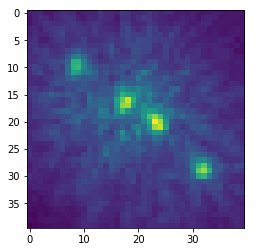

In [19]:
plt.imshow(cimg_posscan_2mm)

### GCNR with pos_scan 1mm & ROI(0dB)

In [20]:
cimg_posscan_1mm = np.load('npy_data/ESE/pos_scan/dim_4_posdef_0/dr/np_3/20181115_0_2_mm/cimg_max_sigma_10_0.npy')
analyzer6 = ImageQualityAnalyzerGCNR(cimg_posscan_1mm, roi_0dB)
GCNR6 = analyzer6.get_gcnr()
GCNR6

1.0

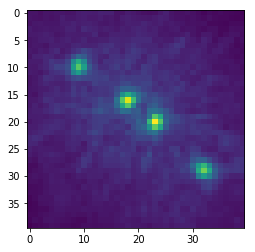

In [21]:
plt.imshow(cimg_posscan_1mm)